In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = pd.read_excel('Titanic.xlsx')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# NULL values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic.shape

(891, 12)

In [9]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
import math
age_mean = math.floor(titanic.Age.mean())
age_mean

29

In [12]:
# impute age with mean value for NULLs
titanic.Age = titanic['Age'].fillna(age_mean)

In [13]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# using below cols for modeling:
X_cols = ['Pclass','Sex','Age','Fare','Survived']

In [19]:
df = titanic[X_cols]
df.head(2)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1


In [22]:
# Encode Sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Sex']= le.fit_transform(df['Sex'])
df.head(2)

<ipython-input-23-62d076e87a3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']= le.fit_transform(df['Sex'])


,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1


In [26]:
X = df.drop('Survived',axis='columns')
y = df['Survived']

In [24]:
# Split the data in train & test
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [28]:
# import tree
from sklearn import tree

In [29]:
# create instance of the model
dt_model = tree.DecisionTreeClassifier()

In [30]:
# fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
# check the score of the model
dt_model.score(X_test,y_test)

0.7932960893854749

### Running Logistic Regression

In [32]:
# Lets run logistics as well
from sklearn.linear_model import LogisticRegression

In [33]:
le = LogisticRegression()

In [34]:
le.fit(X_train,y_train)

LogisticRegression()

In [35]:
le.score(X_test,y_test)

0.8491620111731844

#### Confusion matrix for Logistic Regression

In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test,le.predict(X_test))

In [40]:
import seaborn as sns

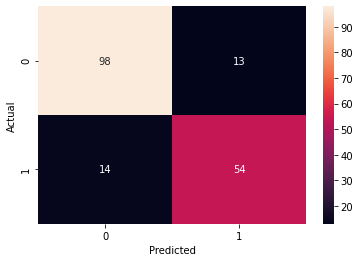

In [43]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
# Accuracy from confusion matrix
(98+54)/(98+54+14+13)

0.8491620111731844